**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 2

In [1]:
from __future__ import division, print_function, unicode_literals

import matplotlib.pyplot as plt
# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.simplefilter('ignore')

## DATA PREPARATION & VISUALIZATION 

In [2]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [3]:
train = pd.read_csv("train.csv") #reading train.csv
test = pd.read_csv("test.csv") #reading test.csv

### a)  Split your data into X and y:

In [4]:
train_x_a = train.drop(columns='label') #containing all the input features of train set
train_y = train[['label']] #containing the target label only of train set
test_x = test.drop(columns='label') #containing all the input features of test set
test_y = test[['label']]  #containing the target label only of test set

### b)  Visualizing the data:

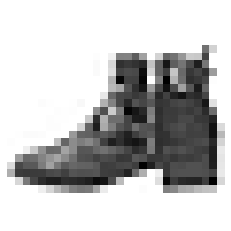

In [5]:
def plot_image(row): #plotting the resulting 28x28 image.
    image = row.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
    plt.axis("off")
    pass
plot_image(np.array(train_x_a)[56])

### c) Class visualization:

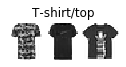

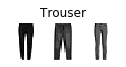

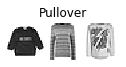

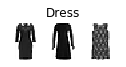

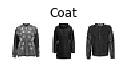

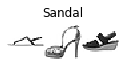

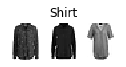

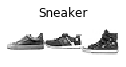

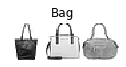

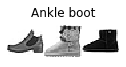

In [6]:
def plot_images(instances, images_per_row=10, **options): #class visualization; plotting 3 instances of each class in the training set.
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

for i in range(10): #plotting 3 instances of each class in the training set.
    plt.figure(figsize=(2,2))
    plot_images(train[train["label"]==i].head(3).drop("label", axis=1).to_numpy(), images_per_row=3)
    plt.title(class_labels[i])
    plt.show()

### d) Average visualization:

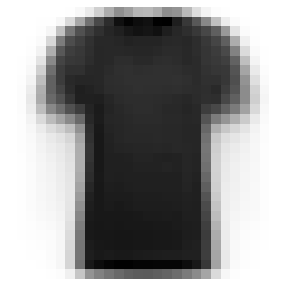

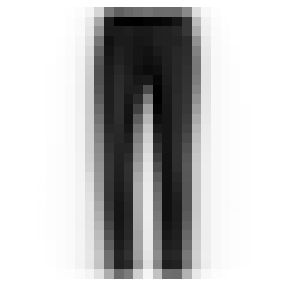

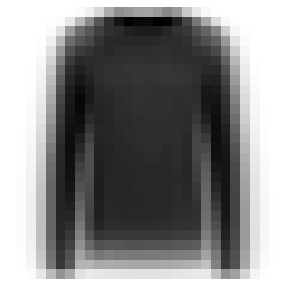

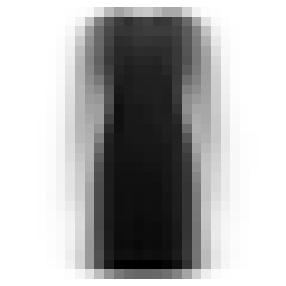

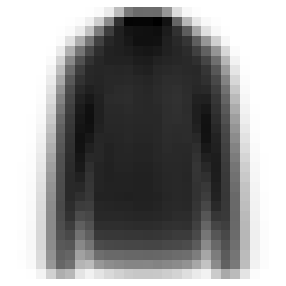

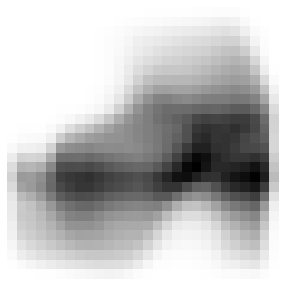

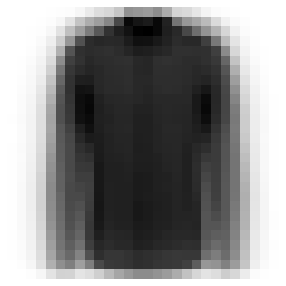

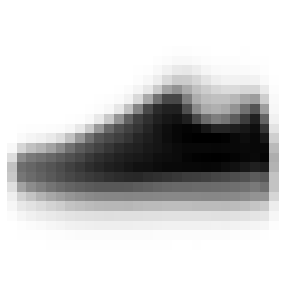

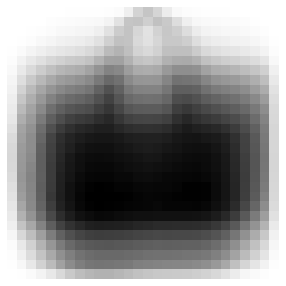

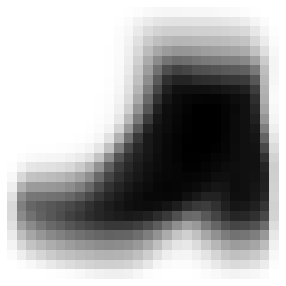

In [7]:
for i in range(10): #plotting the average image for each class in the training set
    plt.figure(figsize=(5,5))
    plot_image(train[train["label"]==i].drop("label", axis=1).mean().to_numpy())
    plt.show()

## BINARY CLASSIFICATION

### e) Binary transformation:

In [8]:
def transformingLabels(df,toBeReplaces): #transforming class labels to binary (0 and 1).
    for i in range(len(toBeReplaces)):
        if toBeReplaces[i] in ['T-shirt/top', 'Pullover', 'Shirt', 'Trouser', 'Dress', 'Coat']:
            #If the item is a piece of clothing labelling it as 1
            df = df.replace(i,1)
        else:
            #If the item is a piece of non-clothing labelling it as 0
            df = df.replace(i,0)  
    return df

In [9]:
train_y_e = transformingLabels(train_y,class_labels) #transforming class labels to binary (0 and 1) for train_y

In [10]:
test_y_e = transformingLabels(test_y,class_labels)  #transforming class labels to binary (0 and 1) for test_y

### f) Binary Classification Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression() #Logistic Regression model
score = cross_val_score(log_clf,train_x_a[:25000],train_y_e[:25000], cv=5, scoring = "accuracy") #performing 5-fold Cross Validation on the training data.
print("Mean Accuracy: " + str(score.mean())) #mean accuracy

Mean Accuracy: 0.9761200472384018


### g) Predict test data:

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

log_clf.fit(train_x_a[:25000], train_y_e[:25000]) #training the model with train_x_a and train_y_e
pred_y = log_clf.predict(test_x) #predicting the labels of test_x

accuracy = accuracy_score(test_y_e,pred_y) #accuracy of predictions
precision = precision_score(test_y_e,pred_y) #precision of predictions
recall = recall_score(test_y_e,pred_y) #recall of predictions
f1_score = f1_score(test_y_e,pred_y) #f1 score of predictions
print("Confusion matrix: " + '\n'+ str(confusion_matrix(test_y_e,pred_y))) #confusion matrix of predictions
print("Accuracy score: " + str(accuracy))
print("Precision score: " + str(precision))
print("Recall score: " + str(recall))
print("F1 score: " + str(f1_score))

Confusion matrix: 
[[1924   62]
 [  55 2960]]
Accuracy score: 0.9766046790641871
Precision score: 0.9794837855724685
Recall score: 0.9817578772802653
F1 score: 0.9806195130031472


### h) Model evaluation:


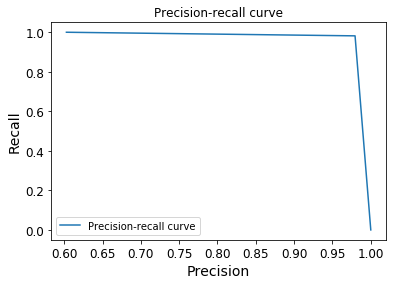

In [13]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y_e,pred_y)

#plotting the model’s precision-recall curve
plt.plot(precisions, recalls, label = 'Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

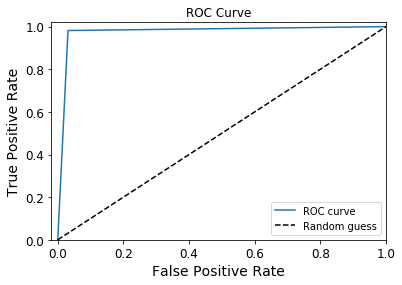

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y_e,pred_y)

#plotting the model’s ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [15]:
from sklearn.metrics import roc_auc_score

print("ROC AUC score: " + str(roc_auc_score(test_y_e,pred_y))) #ROC area under the curve (AUC) score

ROC AUC score: 0.9752696737861548


### i) Learning curves:

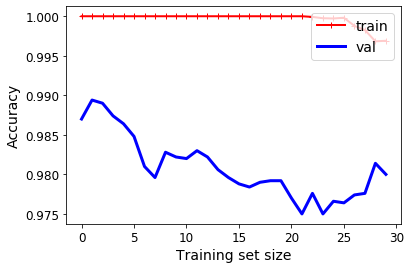

In [16]:
def plot_learning_curves(model, train_x_a, train_y_e, test_x, test_y_e): #plotting the learning curve of a logistic regression model.
    train_errors, val_errors = [], []
    for m in range(1000, len(train_x_a), 1000):
        model.fit(train_x_a[:m], train_y_e[:m])
        y_train_predict = model.predict(train_x_a[:m])
        y_val_predict = model.predict(test_x)
        train_errors.append(accuracy_score(train_y_e[:m], y_train_predict))
        val_errors.append(accuracy_score(test_y_e, y_val_predict))

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("Accuracy", fontsize=14)             

l1_reg = LogisticRegression()
plot_learning_curves(l1_reg, train_x_a, train_y_e, test_x, test_y_e)                       
plt.show()                                      

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### j) Training and cross validating logistic regression:

In [17]:
lg_reg = LogisticRegression() #logistic regression model
score = cross_val_score(lg_reg,train_x_a[:4500],train_y[:4500], cv=3, scoring = "accuracy") #performing 3-fold cross validation
print("Mean Accuracy: " + str(score.mean())) #mean accuracy

Mean Accuracy: 0.7744336506234913


### k) testing logistic regression:

In [18]:
lg_reg.fit(train_x_a[:4500], train_y[:4500]) #fitting a logistic regression model on the training set (train_x_a, train_y)
predict_log = lg_reg.predict(test_x)
#calculating test accuracy by using test_x
test_accuracy = accuracy_score(test_y, predict_log)
#model's confusion matrix on the test set
print("Confusion matrix: " + '\n'+str(confusion_matrix(test_y,predict_log)))

Confusion matrix: 
[[354   9  12  26   8   1  74   2  16   0]
 [  3 465   3  10   2   1   7   0   0   0]
 [ 16   5 338   5  63   0  52   0  11   0]
 [ 27  13  19 371  30   0  45   0   2   0]
 [  3   3  72  28 327   0  59   0  14   0]
 [  4   0  12   3   8 361  27  43   6  26]
 [ 78   5  72  32  56   1 259   0  16   0]
 [  0   0   2   0   2  19   6 414   1  27]
 [  6   0  23  12  25   9  36   2 391   4]
 [  3   0   3   0   1   7   6  24   1 472]]


## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_clf = SVC() #SVC model
param_grid = [{'kernel': ["linear", "rbf","poly"], 'C': [0.1, 0.5, 1, 5, 10],'tol':[0.0001, 0.001, 0.1],'decision_function_shape':['ovo','ovr']}]
grid_search = GridSearchCV(svm_clf, param_grid, cv=5,scoring="accuracy",return_train_score=True)
# using param_grid running GridSearchCV (cv = 5) with an SVC modelon the train_x_a and train_y.
grid_search.fit(train_x_a[:3000], train_y[:3000]) #my computer cannot run fast so I limited by [:3000].

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['linear', 'rbf', 'poly'],
                          'tol': [0.0001, 0.001, 0.1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [20]:
grid_search.best_score_ #best model’s accuracy

0.8103333333333333

In [21]:
grid_search.best_params_ #best model’s parameters

{'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'linear', 'tol': 0.0001}

### m)Testing the best model:

In [22]:
svm_clf_1 = SVC(C=0.1, decision_function_shape= 'ovo', kernel= 'linear', tol=0.0001) #recreating the model using the best parameters in (l)
svm_clf_1.fit(train_x_a[:9000], train_y[:9000]) #my computer cannot run fast so I limited by [:9000].
y_pred = svm_clf_1.predict(test_x)
#calculating its test accuracy
test_accuracy = accuracy_score(test_y, y_pred)
#model’s confusion matrix on the test set
print(test_accuracy)
print("Confusion matrix: " + '\n'+str(confusion_matrix(test_y,y_pred)))

0.8056388722255549
Confusion matrix: 
[[384   1  11  19   2   1  77   0   6   1]
 [  1 480   1   5   1   0   2   0   1   0]
 [ 18   1 344   8  55   0  59   0   5   0]
 [ 43  16  11 406  15   0  14   0   2   0]
 [  3   0 102  14 339   0  47   0   1   0]
 [  0   0   0   0   0 437   0  31   2  20]
 [102   2  74  20  45   0 267   0   9   0]
 [  0   0   0   0   0  31   0 418   0  22]
 [  8   0   4   1   2   6   8   4 475   0]
 [  0   0   0   0   0  13   0  25   0 479]]


## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
param_tree = [{'max_depth': [2, 4, 10], 'min_samples_split': [2, 3, 4]}]
#runing GridSearchCV (cv = 5) with a decision tree model on the train_x_a and train_y
grid_search_tree = GridSearchCV(tree_clf, param_tree, cv=5,scoring="accuracy",return_train_score=True)
grid_search_tree.fit(train_x_a, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, 10],
                          'min_samples_split': [2, 3, 4]}],
             pre_dispatch

In [24]:
grid_search_tree.best_score_ #best model’s accuracy

0.7958068064397853

In [25]:
grid_search_tree.best_params_ #best model’s parameters

{'max_depth': 10, 'min_samples_split': 3}

### o) Testing the best model:

In [27]:
tree_clf_1 = DecisionTreeClassifier(max_depth = 10, min_samples_split = 3) #recreating the model using the best parameters in (n)
tree_clf_1.fit(train_x_a, train_y)
pred = tree_clf_1.predict(test_x)
#calculating its test accuracy
test_accuracy = accuracy_score(test_y, pred)
#model’s confusion matrix on the test set
print(test_accuracy)
print("Confusion matrix: " + '\n' +str(confusion_matrix(test_y,pred)))

0.8002399520095981
Confusion matrix: 
[[382   2   8  38   5   1  60   0   6   0]
 [  5 466   2  16   0   0   2   0   0   0]
 [  5   1 312   3  89   1  72   1   6   0]
 [ 16  11   3 415  27   1  27   1   5   1]
 [  2   2  35  20 384   0  60   0   3   0]
 [  2   1   0   0   0 429   1  27   9  21]
 [ 95   3  53  19  63   0 277   0   9   0]
 [  0   1   1   1   0  20   1 422   1  24]
 [  4   3   7   6   6   4  13   5 455   5]
 [  0   0   0   1   1  12   0  43   0 460]]
